In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [195]:
df=pd.read_csv("/content/sample_data/D3.csv")

data = df.to_numpy()
data1 =df.values[:,0]
data2 =df.values[:,1]
data3 =df.values[:,2]
ydata =df.values[:,3]
m = len(df)




In [196]:
# BLOCK THAT COMBINES T0 and Tn arrays
def translator(x):
  x0 = np.ones((m,1))
  x1 = x.reshape(m,1)
  xtot=np.hstack((x0,x1))
  return xtot
x = translator(data1)

In [197]:
theta = np.zeros(2)
def linreg_sing(theta,x,y): 
  

  temp = x.dot(theta)
  err = np.subtract(temp,y)
  J = 1/(2*m)*np.sum(err*err)
  return J
print(linreg_sing(theta,x,ydata))

5.524438459196242


In [198]:
theta = np.zeros(2)
iter= 1000
a = 0.01
def grad_descent(theta,x,y,a,i):
  loss_array = np.zeros(i)

  for b in range(i):
    pred = x.dot(theta)
    difference = np.subtract(pred,y)
    sumd = (a/m) * x.transpose().dot(difference)
    theta = theta -sumd
    loss_array[b] = linreg_sing(theta,x,y)

  plt.scatter(x[:,1], ydata, color='red', marker= '+', label= 'Training Data') 
  plt.plot(x[:,1],x.dot(theta), color='green', label='Linear Regression') 
  print(theta)
  plt.rcParams["figure.figsize"] = (10,6) 
  plt.grid() 
  plt.xlabel('interval') 
  plt.ylabel('data value') 
  plt.title('Linear Regression Fit for model') 
  plt.legend() 
  return loss_array

[ 5.92794892 -2.03833663]


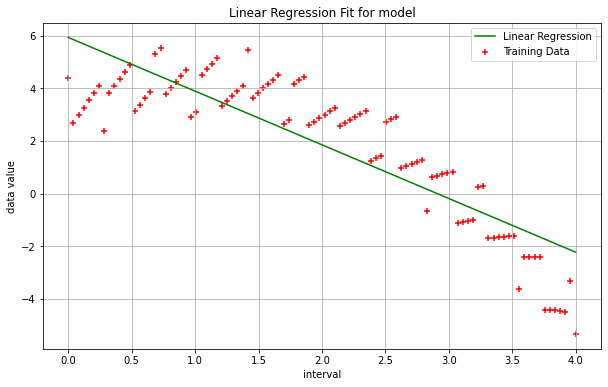

In [199]:
theta = np.zeros(2)
iter= 1000
a = 0.1

x = translator(data1)
l=grad_descent(theta,x,ydata,a,iter)

Text(0, 0.5, 'Loss')

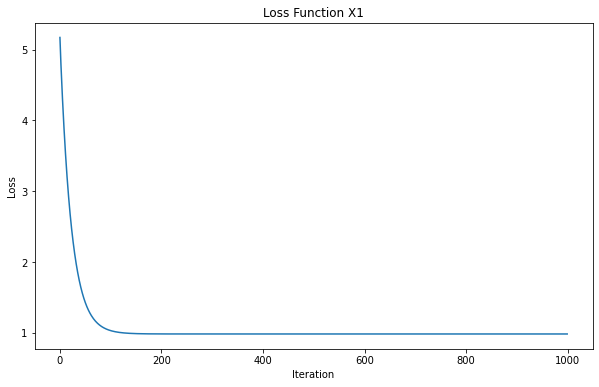

In [200]:
plt.plot(range(1000),l)
plt.title('Loss Function X1')
plt.xlabel('Iteration')
plt.ylabel('Loss')

[0.73606043 0.55760761]


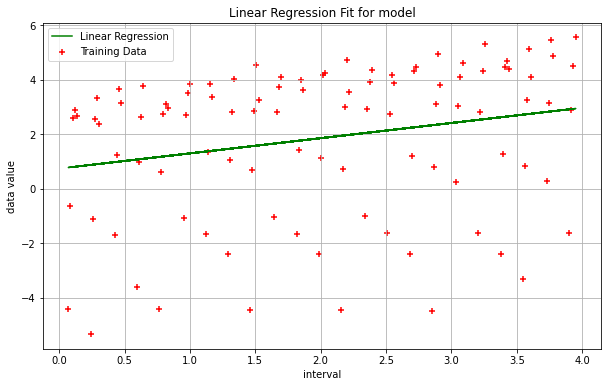

In [201]:
x = translator(data2)
l=grad_descent(theta,x,ydata,a,iter)

Text(0, 0.5, 'Loss')

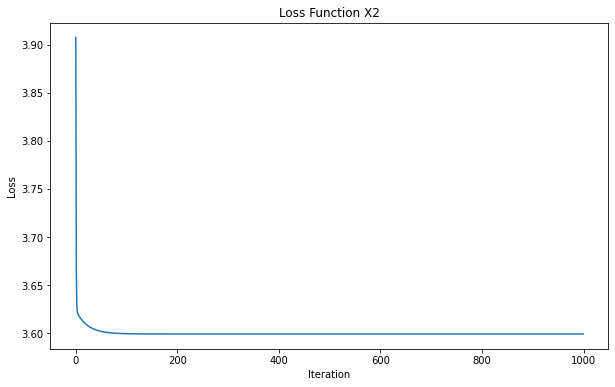

In [202]:
plt.plot(range(1000),l)
plt.title('Loss Function X2')
plt.xlabel('Iteration')
plt.ylabel('Loss')

[ 2.8714221  -0.52048288]


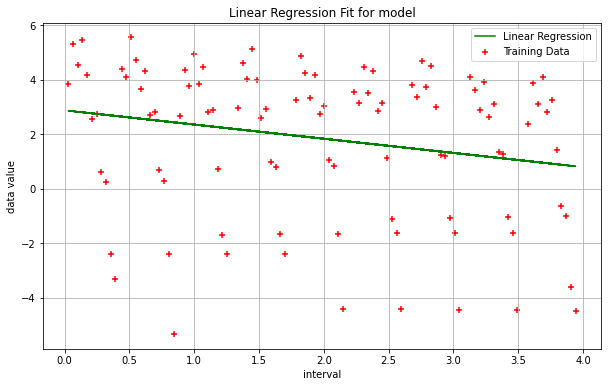

In [203]:
x= translator(data3)
l=grad_descent(theta,x,ydata,a,iter)

Text(0, 0.5, 'Loss')

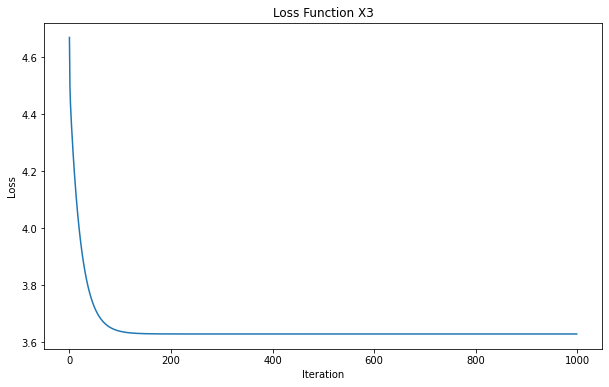

In [204]:
plt.plot(range(1000),l)
plt.title('Loss Function X3')
plt.xlabel('Iteration')
plt.ylabel('Loss')

[ 5.31393577 -2.00368658  0.53260157 -0.26556795]


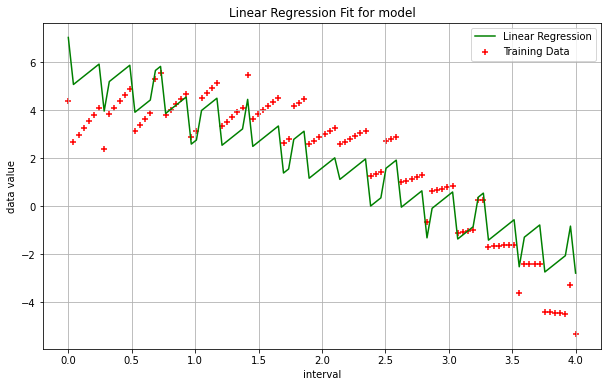

In [205]:
#part B
theta = np.zeros(4)
d = data1
b = data2
c = data3
x=np.hstack((np.ones((m,1)),d.reshape(m,1),b.reshape(m,1), c.reshape(m,1)))

l=grad_descent(theta,x,ydata,a,iter)

Text(0, 0.5, 'Loss')

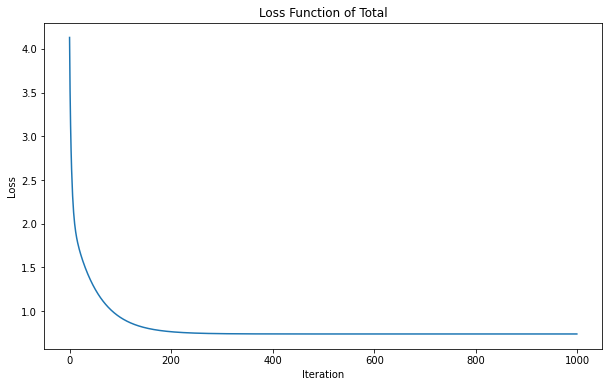

In [206]:
plt.plot(range(1000),l)
plt.title('Loss Function of Total')
plt.xlabel('Iteration')
plt.ylabel('Loss')